# Project1-Group17

In [1]:
from IPython.display import display
from scipy.stats import pearsonr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [3]:
sample=pd.read_csv('results-2021-12-18.csv')

In [131]:
size=()

In [130]:
def set_style(Size:str):
    global size
    size_dict={'small':(6,4),'medium':(9,6),'lager':(12,8)}
    size=size_dict[Size]

In [134]:
set_style('medium')

## Task1

### Number of Records with Specific Numeric Factors

In [4]:
pairs_count = sample[["no_datapoints", "no_features"]].value_counts()

In [5]:
def optimize(axes, xlabel, ylabel):
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, rotation='horizontal', ha='right', y=1, va='bottom')

In [6]:
def show_num_dist(axes, pairs_data, label, dot_size=None, alpha=1):
    axes.scatter([x[0] for x in pairs_data], [x[1] for x in pairs_data], s=dot_size, alpha=alpha, label=label)

In [7]:
def show_pair_cum(axes, pairs_data):
    for k, v in pairs_data.items():
        axes.text(k[0] + 50, k[1] - 250, v)

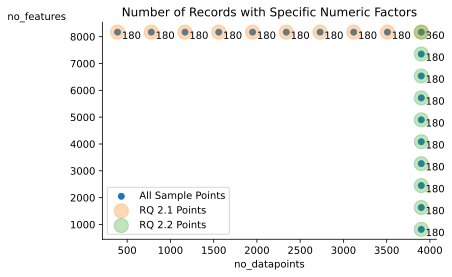

In [8]:
fig, ax = plt.subplots()
show_num_dist(ax, pairs_count.index, label="All Sample Points")
optimize(ax, "no_datapoints", "no_features")
show_pair_cum(ax, pairs_count)
ax.set_title("Number of Records with Specific Numeric Factors")

rq2_1_data = sample[sample["RQ"] == 2.1]
rq2_2_data = sample[sample["RQ"] == 2.2]

show_num_dist(ax, rq2_1_data[["no_datapoints", "no_features"]].value_counts().index, alpha=0.3, dot_size=200, label="RQ 2.1 Points")
show_num_dist(ax, rq2_2_data[["no_datapoints", "no_features"]].value_counts().index, alpha=0.3, dot_size=200, label="RQ 2.2 Points")
ax.legend()

### Precision & Recall

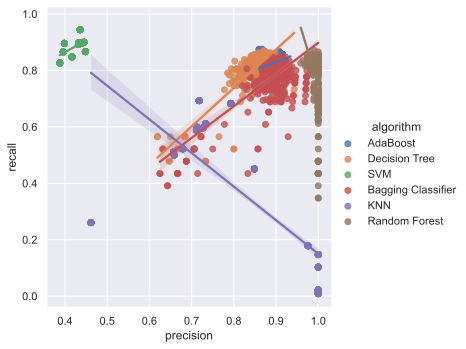

In [9]:
sns.set_theme()
# plt.rcParams['axes.facecolor']='white'
g = sns.lmplot(
    data=sample,
    x="precision", y="recall", hue="algorithm",
    height=5
)
g.set_axis_labels("precision", "recall")

### predict_energy vs train_energy

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

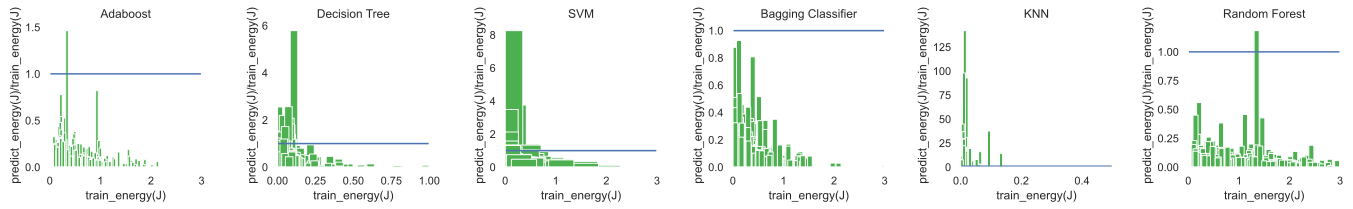

In [10]:
# alglist=result['algorithm'].unique()
# labels=[]
# for i in range(len(alglist)):
#     labels.append(alglist[i])
# print(labels)
sample[['algorithm','train_energy(J)','predict_energy(J)']]
plt.rcParams['axes.facecolor']='white'
AdaBoost_list=[]
AdaBoost_listp=[]
Decision_Tree_list=[]
Decision_Tree_listp=[]
SVM_list=[]
SVM_listp=[]
Bagging_Classifier_list=[]
Bagging_Classifier_listp=[]
KNN_list=[]
KNN_listp=[]
Random_Forest_list=[]
Random_Forest_listp=[]
# print(len(result['train_energy(J)']))
for i in range(len(sample['train_energy(J)'])):
#     print(result['algorithm'][i])
#     print(result['train_energy(J)'][i])
        if sample['algorithm'][i]=="AdaBoost":
            AdaBoost_list.append(sample['train_energy(J)'][i])
            AdaBoost_listp.append(sample['predict_energy(J)'][i]/sample['train_energy(J)'][i])
        elif sample['algorithm'][i]=="Decision Tree":
            Decision_Tree_list.append(sample['train_energy(J)'][i])
            Decision_Tree_listp.append(sample['predict_energy(J)'][i]/sample['train_energy(J)'][i])
        elif sample['algorithm'][i]=="SVM":
            SVM_list.append(sample['train_energy(J)'][i])
            SVM_listp.append(sample['predict_energy(J)'][i]/sample['train_energy(J)'][i])
        elif sample['algorithm'][i]=="Bagging Classifier":
            Bagging_Classifier_list.append(sample['train_energy(J)'][i])
            Bagging_Classifier_listp.append(sample['predict_energy(J)'][i]/sample['train_energy(J)'][i])
        elif sample['algorithm'][i]=="KNN":
            KNN_list.append(sample['train_energy(J)'][i])
            KNN_listp.append(sample['predict_energy(J)'][i]/sample['train_energy(J)'][i])
        elif sample['algorithm'][i]=="Random Forest":
            Random_Forest_list.append(sample['train_energy(J)'][i])
            Random_Forest_listp.append(sample['predict_energy(J)'][i]/sample['train_energy(J)'][i])

plt.subplots_adjust(left=0, bottom=0, right=3, top=0.5, wspace=0.5, hspace=0.5)
# Adaboost
plt.subplot(1,6,1)
plt.title('Adaboost')
plt.xlim((0, 3))
plt.bar(AdaBoost_list,AdaBoost_listp,color = "#4CAF50",width=0.05)
plt.xlabel('train_energy(J)')
plt.ylabel('predict_energy(J)/train_energy(J)')
plt.axhline(y=1)
plt

# Decision Tree
plt.subplot(1,6,2)
plt.xlim((0, 1))
plt.title('Decision Tree')
plt.bar(Decision_Tree_list,Decision_Tree_listp,color = "#4CAF50",width=0.05)
plt.xlabel('train_energy(J)')
plt.ylabel('predict_energy(J)/train_energy(J)')
plt.axhline(y=1)
plt

# SVM
plt.subplot(1,6,3)
plt.title('SVM')
plt.xlim((0, 3))
plt.bar(SVM_list,SVM_listp,color = "#4CAF50",width=0.5)
plt.xlabel('train_energy(J)')
plt.ylabel('predict_energy(J)/train_energy(J)')
plt.axhline(y=1)
plt


# Bagging_Classifier
plt.subplot(1,6,4)
plt.title('Bagging Classifier')
plt.xlim((0, 3))
plt.bar(Bagging_Classifier_list,Bagging_Classifier_listp,color = "#4CAF50",width=0.1)
plt.xlabel('train_energy(J)')
plt.ylabel('predict_energy(J)/train_energy(J)')
plt.axhline(y=1)
plt

# KNN
plt.subplot(1,6,5)
plt.title('KNN')
plt.xlim((0, 0.5))
plt.bar(KNN_list,KNN_listp,color = "#4CAF50",width=0.01)
plt.xlabel('train_energy(J)')
plt.ylabel('predict_energy(J)/train_energy(J)')
plt.axhline(y=1)
plt


# Random_Forest
plt.subplot(1,6,6)
plt.title('Random Forest')
plt.xlim((0, 3))
plt.bar(Random_Forest_list,Random_Forest_listp,color = "#4CAF50",width=0.1)
plt.xlabel('train_energy(J)')
plt.ylabel('predict_energy(J)/train_energy(J)')
plt.axhline(y=1)
plt

## Task2

In [11]:
def basic_process(dataset:pd.core.frame.DataFrame,_type,algorithm=None):
    '''
    描述：对给的的Dataframe进行初步的处理
    输入：
        dataset:原始数据集或者与之类似的数据集转换而成的DF
        _type:要选择的实验类型的数据
        algorithm:要选择的算法(一个list),如果不输入该参数，默认全部的algorithm
    输出：一个处理之后的DF
    '''
    result_list=list()
    if not algorithm: algorithm=list(dataset['algorithm'].unique())
    groupby_algorithm=dataset.query(f'RQ=={_type} and algorithm == {algorithm}').groupby(dataset['algorithm'])
    for name_group in groupby_algorithm: result_list.append(name_group[1])
    return pd.concat(result_list)

In [147]:
def draw_linepolt_withCI(resource:pd.core.frame.DataFrame,x_axis='no_features',y_axis='train_energy(J))'):
    '''
    描述：根据给定的Dataframe和字段绘制带有置信区间的折线图
    '''
    plt.figure(figsize=size)
    sns.lineplot(data=resource,x=x_axis,y=y_axis)

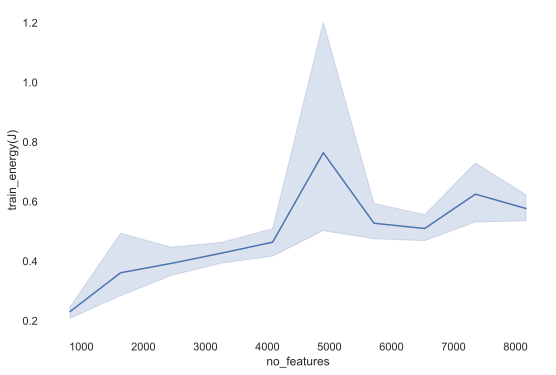

In [148]:
Parameters={
    'resource':basic_process(dataset=sample,algorithm=['SVM'],_type=2.2),
    'x_axis':'no_features',
    'y_axis':"train_energy(J)"
}
draw_linepolt_withCI(**Parameters)

## Task3

In [14]:
def advance_process(dataset:pd.core.frame.DataFrame):
    '''
    描述：以experiment_id为组，求出组内30次iteration各字段的均值，并合并成Dataframe
    输入：一个将要被处理的初始Dataframe
    输出：一个包含了均值的Dataframe
    
    不用.agg()是因为存在不可求均值的字段
    '''
    field,result_list=list(dataset.columns),list()
    group_id=dataset.groupby(dataset['experiment_id'])
    for name_group in group_id:
        Mean_series=name_group[1].mean()
        Mean_dataframe=pd.DataFrame(Mean_series).T
        Mean_dataframe['algorithm']=name_group[1]['algorithm'].iloc[0]
        result_list.append(Mean_dataframe)
    return pd.concat(result_list)

In [149]:
def draw_multiplot(dataset:pd.core.frame.DataFrame,xaxis,yaxis,subplot):
    '''
    描述：根据输入的数据集绘制成mutiple_plot
    输入：一个Dataframe，DF中要作为x轴的字段，DF中要作为y轴的字段，用以区分不太同子图的字段
    输出：一个mutiple_polt
    '''
    temp_group=dataset.groupby(subplot)
    dataset=temp_group.apply(lambda x:x.sort_values(by=xaxis))
    grid = sns.FacetGrid(dataset, col=subplot, hue=subplot, palette="tab20c",col_wrap=6, height=3)
    grid.map(plt.plot, xaxis, yaxis, marker="o")
    grid.fig.tight_layout(w_pad=2)

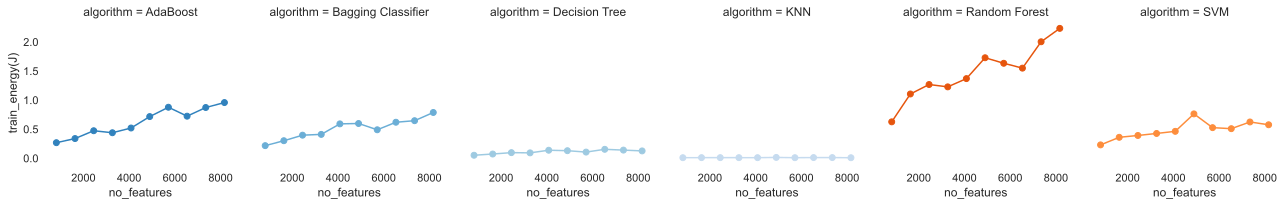

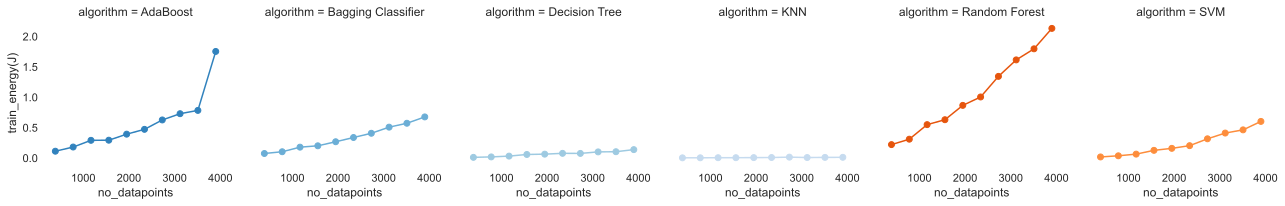

In [150]:
Parameters={
    "dataset":advance_process(basic_process(sample,_type=2.2)),
    "xaxis":"no_features",
    "yaxis":"train_energy(J)",
    "subplot":"algorithm"
}
draw_multiplot(**Parameters)

Parameters={
    "dataset":advance_process(basic_process(sample,_type=2.1)),
    "xaxis":"no_datapoints",
    "yaxis":"train_energy(J)",
    "subplot":"algorithm"
}
draw_multiplot(**Parameters)

## Task4

In [17]:
from matplotlib.lines import Line2D
cols_needed = ["algorithm", "RQ", "no_datapoints", "no_features", "train_energy(J)"]
data_needed = sample[cols_needed]
conv_energy_avg = data_needed.groupby(cols_needed[:-1]).mean()[cols_needed[-1]]
list_energy_avg = [[a, r, d, f, e] for (a, r, d, f), e in conv_energy_avg.items()]
data_energy_avg = pd.DataFrame(list_energy_avg, columns=cols_needed)
data_energy_avg

,algorithm,RQ,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2.1,389,8169,0.113206
1,AdaBoost,2.1,779,8169,0.181939
2,AdaBoost,2.1,1169,8169,0.292226
3,AdaBoost,2.1,1559,8169,0.294380
4,AdaBoost,2.1,1950,8169,0.393638
...,...,...,...,...,...
115,SVM,2.2,3900,4901,0.763848
116,SVM,2.2,3900,5718,0.527261
117,SVM,2.2,3900,6535,0.509580
118,SVM,2.2,3900,7352,0.624900


In [18]:
def norm(seq):
    return seq / max(seq)

In [19]:
def draw_tree_left(axes, data, x, y, pos, color_trunk, color_branch):
    markerline, stemlines, baseline = axes.stem(
        data[y], pos + 0.8 * norm(data[x]), bottom=pos, linefmt=color_branch)
    markerline.set_color(color_branch)
    baseline.set_color(color_trunk)

In [20]:
def draw_tree_right(axes, data, x, y, pos, color_trunk, color_branch):
    markerline, stemlines, baseline = axes.stem(
        data[y], pos - 0.8 * norm(data[x]), bottom=pos, linefmt=color_branch)
    markerline.set_color(color_branch)
    baseline.set_color(color_trunk)

In [21]:
def draw_tree(axes, data_left, data_right, label_left, label_right, label_branch, pos, color_trunk, color_left, color_right):
    draw_tree_left(axes, data_left, label_left, label_branch, pos, color_trunk, color_left)
    draw_tree_right(axes, data_right, label_right, label_branch, pos, color_trunk, color_right)

In [22]:
def draw_forest(axes, data, judge, judge_left, judge_right, label_trees, label_left, label_right, label_trunk, color_trunk, color_left, color_right):
    data_left_groups = data[data[judge] == judge_left].groupby(label_trees)
    data_right_groups = data[data[judge] == judge_right].groupby(label_trees)
    name_trunks = data[label_trees].value_counts().index
    
    for index, algo in enumerate(name_trunks):
        data_left, data_right = data_left_groups.get_group(algo), data_right_groups.get_group(algo)
        draw_tree(axes, data_left, data_right, label_left, label_right, label_trunk, index * 2, color_trunk, color_left, color_right)
    
    axes.set_yticks([x * 2 for x in range(len(name_trunks))])
    axes.set_yticklabels(name_trunks)
    
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xlabel(label_trunk)
    axes.set_ylabel(label_trees, rotation='horizontal', ha='right', y=1, va='bottom')
    
    custom_lines = [Line2D([0], [0], color=color_left, lw=4), Line2D([0], [0], color=color_right, lw=4)]
    ax.legend(custom_lines, [label_left, label_right])

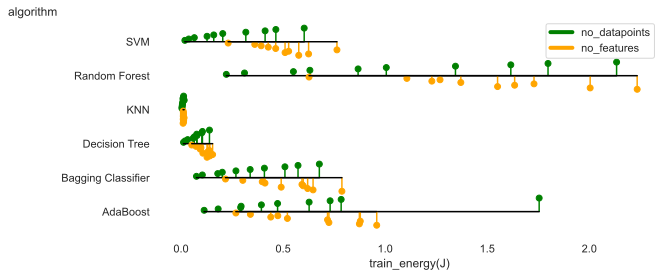

In [23]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
draw_forest(ax, data_energy_avg, "RQ", 2.1, 2.2, "algorithm", "no_datapoints", "no_features", "train_energy(J)", "black", "green", "orange")

## Task5

In [70]:
def cal_Relevant(dataset:pd.core.frame.DataFrame,factor_1:str,factor_2:str):
    '''
    描述：求出某个Dataframe两个field之间的相关系数(根据algorithm分类)
    输入：一个Dataframe，与这个DF中两个field的名字
    输出：返回一个Series，内容是algorithm的名字，以及对应的相关系数
    '''
    result=pd.Series([factor_1+' with '+factor_2]) #添加相关系数的名字(哪两个字段的相关系数)
    for algorithm in dataset['algorithm'].unique():
        tempory=dataset[dataset['algorithm']==algorithm]
        result[algorithm]=pearsonr(tempory[factor_1],tempory[factor_2])[0]
    return result#[1:]

In [89]:
def Turn_to_DF(Series1,Series2):
    '''
    描述：将两个Series转化成便于画图的Dataframe
    输入：两个由cal_Relevant函数得出来的Series
    输出：一个便于作图的Dataframe
    '''
    
    Type=([Series1[0]]*6)
    Type.extend([Series2[0]]*6)
    
    DF=pd.DataFrame(pd.concat([fea_rev[1:],dp_rev[1:]],axis=0))
    DF['algorithm']=DF.index
    DF['Type']=Type
    DF=DF.rename(columns={0:"Correlation coefficient"})
    
    return DF

In [92]:
Parameters={
    'Series1':cal_Relevant(basic_process(sample,_type=2.2),'no_features','train_energy(J)'),
    'Series2':cal_Relevant(basic_process(sample,_type=2.1),'no_datapoints','train_energy(J)')
}

Turn_to_DF(**Parameters)

,Correlation coefficient,algorithm,Type
AdaBoost,0.400534,AdaBoost,no_features with train_energy(J)
Bagging Classifier,0.467683,Bagging Classifier,no_features with train_energy(J)
Decision Tree,0.250531,Decision Tree,no_features with train_energy(J)
KNN,0.028783,KNN,no_features with train_energy(J)
Random Forest,0.433133,Random Forest,no_features with train_energy(J)
SVM,0.248547,SVM,no_features with train_energy(J)
AdaBoost,0.334538,AdaBoost,no_datapoints with train_energy(J)
Bagging Classifier,0.74426,Bagging Classifier,no_datapoints with train_energy(J)
Decision Tree,0.685958,Decision Tree,no_datapoints with train_energy(J)
KNN,0.28628,KNN,no_datapoints with train_energy(J)


In [132]:
def draw_Grouped_barplot(dataset:pd.core.frame.DataFrame,Interval=True):
    plt.figure(figsize=size)
    
    sns.barplot(data=dataset, x='algorithm', y='Correlation coefficient', hue='Type')
    
    if Interval:
        interval=[x/10 for x in range(2,12,2)]
        height=[x/10 for x in range(9,0,-2)]
        interval_name=['Highly linear correlation','Significant linear correlation',
                   'Moderate linear correlation','Low linearity correlation','No linear correlation']
    
        for height_line,Text,interval_line in zip(height,interval_name,interval):
            plt.axhline(y=interval_line,color=sns.color_palette("Paired")[8],linestyle='--')
            plt.text(5.75,height_line,Text,fontsize=12)

In [ ]:
#这张图中一共有6组bar，每组2个bar，一共6*2=12条bar。其中bar的高度代表了相关系数的值
#相关系数的计算公式为：  (其值的大小介于0~1之间)
#每个组的第一条bar是对应算法的"no_features"和"train_energy(J)"的相关系数
#每个组的第一条bar是对应算法的"no_features"和"train_energy(J)"的相关系数
#根据相关系数的定义，我们还给相关系数划分了五个区间，对应的相关性描述写在了右边

#普遍来说，no_features和train_energy(J)之间的线性关系不够强，而no_datapoints和train_energy(J)之间的线性关系较强
#如果我们关注Bagging Classifier, Decision Tree, Random Forest, SVM这四个算法，我们会发现它们的
#no_datapoints和train_energy(J)的相关系数较高(between 0.6 to 0.8)，按照定义存在Significant linear correlation
#这意味着当no_datapoints的值增大的时候，train_energy(J)也会一同显著增大

#尽管绝大多数算法的train_energy(J)都会随着no_datapoints和no_features的增大而增大。
#但有个算法例外，它就是KNN算法。这个算法的相关系数较小，这意味着即使no_datapoints和no_features增大，train_energy(J)
#的增大也不明显。如果我们的数据包括了大量的的datapoints和features，但又不想train_energy(J)过大，我们可以选择KNN算法。

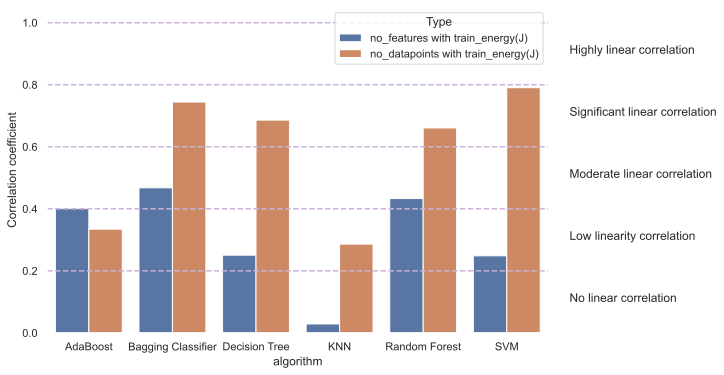

In [135]:
draw_Grouped_barplot(Turn_to_DF(**Parameters),Interval=True)